In [0]:
# Description: This program classifies images


In [1]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 272s 2us/step


In [2]:
#Print the data type of x_train
print(type(x_train))
#Print the data type of y_train
print(type(y_train))
#Print the data type of x_test
print(type(x_test))
#Print the data type of y_test
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
#Get the shape of x_train
print('x_train shape:', x_train.shape) #4D array 50,000 rows 32x32 pixel image with depth = 3 visible wave lenghts (RGB)
#Get the shape of y_train
print('y_train shape:', y_train.shape) #2D array 50,000 rows and 1 column
#Get the shape of x_train
print('x_test shape:', x_test.shape) #4D array 10,000 rows 32x32 pixel image with depth = 3 visible wave lenghts (RGB)
#Get the shape of y_train
print('y_test shape:', y_test.shape) #2D array 10,000 rows and 1 column

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [4]:
#Take a look at the first image (at index=0) in the training data set as a numpy array
#This shows the image as a series of pixel values
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
#Show the image as an image instead of a series of pixel values using matplotlib
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [6]:
#Print the label of the image, NOTE: the number 6 = frog
#0 = airplane
#1 = automobile
#2 = bird
#3 = cat
#4 = deer
#5 = dog
#6 = frog
#7 = horse
#8 = ship
#9 = truck
print('The label is:', y_train[0])

The label is: [6]


In [7]:
#One-Hot Encoding 
#Convert the labels into a set of 10 numbers to input into the neural network
import keras

y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [8]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
# processed data from RGB color into  0 to 1 value
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 221s 6ms/step - loss: 1.5512 - accuracy: 0.4345 - val_loss: 1.1173 - val_accuracy: 0.6016
Epoch 2/20
40000/40000 [==============================] - 214s 5ms/step - loss: 1.1165 - accuracy: 0.6033 - val_loss: 0.9503 - val_accuracy: 0.6666
Epoch 3/20
40000/40000 [==============================] - 197s 5ms/step - loss: 0.9599 - accuracy: 0.6617 - val_loss: 0.8497 - val_accuracy: 0.6931
Epoch 4/20
40000/40000 [==============================] - 198s 5ms/step - loss: 0.8606 - accuracy: 0.6963 - val_loss: 0.7821 - val_accuracy: 0.7250
Epoch 5/20
40000/40000 [==============================] - 198s 5ms/step - loss: 0.7937 - accuracy: 0.7198 - val_loss: 0.7429 - val_accuracy: 0.7403
Epoch 6/20
40000/40000 [==============================] - 199s 5ms/step - loss: 0.7358 - accuracy: 0.7415 - val_loss: 0.7233 - val_accuracy: 0.7501
Epoch 7/20
40000/40000 [==============================] - 198s

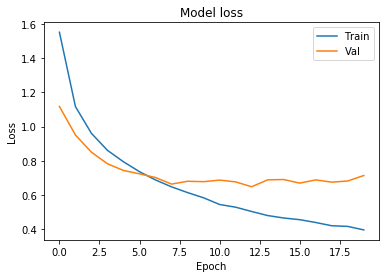

In [17]:
# Calculate the lost of model

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

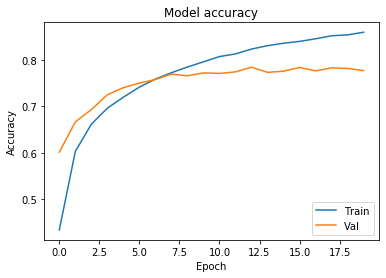

In [19]:
# Visualize model accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [20]:
# get accuracy for model

model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 11s 1ms/step


0.7754999995231628

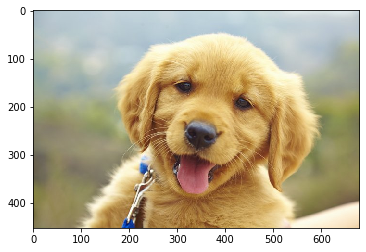

In [3]:
import matplotlib.pyplot as plt

my_image = plt.imread("./testing/puppy.jpg")

plt.imshow(my_image)

In [4]:
from skimage.transform import resize

my_image_resized = resize(my_image, (32,32,3))

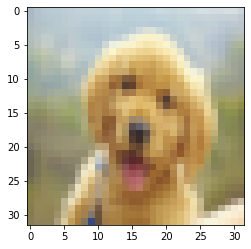

In [5]:
img = plt.imshow(my_image_resized)

In [31]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [32]:
probabilities

array([[4.7313815e-06, 2.0099657e-07, 4.6701230e-02, 1.0684356e-02,
        4.4503252e-04, 9.3383050e-01, 1.7065258e-03, 6.6039423e-03,
        2.0184330e-05, 3.1681191e-06]], dtype=float32)

In [33]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: dog -- Probability: 0.9338305
Second most likely class: bird -- Probability: 0.04670123
Third most likely class: cat -- Probability: 0.010684356
Fourth most likely class: horse -- Probability: 0.0066039423
Fifth most likely class: frog -- Probability: 0.0017065258


In [34]:
model.save('img_classification_2.h5') # Save model for using later